In [9]:
import numpy as np
import torch
import wandb
import matplotlib.pyplot as plt
from torchsummary import summary

from ensemblecalibration.nn_training.binary_experiments import cone_experiment_h0, cone_experiment_h1
from ensemblecalibration.nn_training.train import train_mlp, get_optim_lambda_mlp
from ensemblecalibration.nn_training.model import MLPCalW
from ensemblecalibration.nn_training.dataset import MLPDataset
from ensemblecalibration.nn_training.model import MLPCalW
from ensemblecalibration.calibration.config import config_new_mlp_binary
from ensemblecalibration.calibration.calibration_estimates.helpers import calculate_pbar


## Cone Experiment: 

First load the relevant parameters for the training and the calibration test:

In [12]:
# initialize config
params_skce = config_new_mlp_binary["SKCEul"]["params"]
params_l2 = config_new_mlp_binary["L_2"]["params"]

# chose which parameters to use
params = params_skce

### 1. Test $H_0$ hypothesis:
Here, we set the calibrated predictor to be within the convex hull of the two ensemble members.

In [13]:
x_inst, p_probs, y_labels, p_bar, weights = cone_experiment_h0(n_samples = params["n_samples"],
                                                               deg_fct=params["deg_fct"],
                                                               )

Plot:

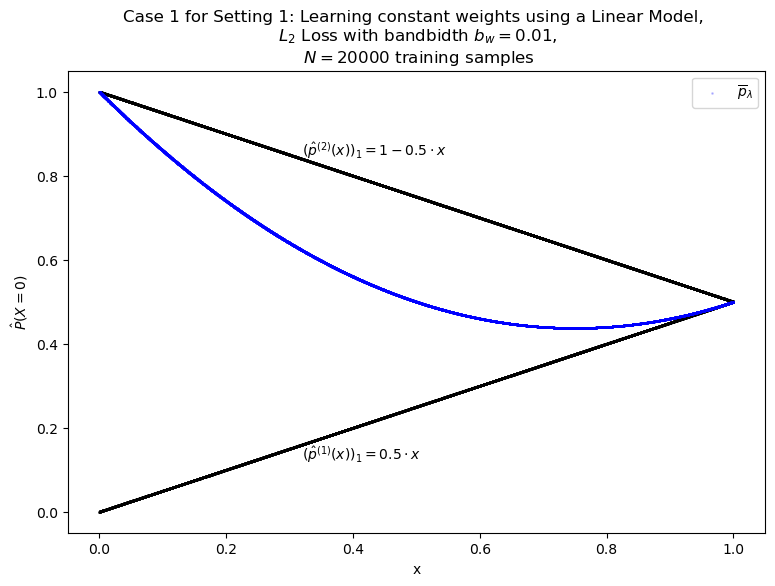

In [14]:
# plot the calculated predicted probabilities vs the real calibrated ones for the constant case
fig, ax = plt.subplots(figsize=(9, 6))

#scatter plot ensemble predictions 
ax.scatter(x_inst.squeeze(), p_probs[:,0,0], alpha=0.2, s=1, 
           color="black")
ax.scatter(x_inst.squeeze(), p_probs[:,0,1],  alpha=0.2, s=1,
           color="black")
# plot convex combination with constant weights, for w = 0.5
ax.scatter(x_inst.squeeze(), p_bar[:, 0], label='$\overline{p}_{\lambda}$', s=1, alpha=0.2, 
           color="blue")
#ax.scatter(x_inst.squeeze(), p_bar_pred[:, 0], label='$\widehat{\overline{p}}$', s =1,
 ##           alpha=0.2)

ax.set_xlabel('x')

ax.set_ylabel('$\hat{P}(X=0)$')
ax.text(0.32, 0.125, "$(\hat{p}^{(1)}(x))_1 = 0.5 \cdot x$", fontsize=10, color='black')
ax.text(0.32, 0.85, "$(\hat{p}^{(2)}(x))_1 = 1 - 0.5 \cdot x$", fontsize=10, color='black')

plt.title("Case 1 for Setting 1: Learning constant weights using a Linear Model, \n $L_2$ Loss with bandbidth $b_w=0.01$, \n $N=20000$ training samples")
plt.legend()

# now calculate the average distane between calibrated predictions and estimated ones
# ( mean absolute error)
#mae_const = np.mean(np.abs(p_bar - p_bar_pred))
#print(f"MAE for constant weights: {mae_const}")

#ax.text(0.32, 0.6, f"MAE = {mae_const:.3f}", fontsize=10, color='black')

test which weight vector is found by the MLP model:

In [15]:
dataset_h0 = MLPDataset(x_train=x_inst, P=p_probs, y=y_labels)

weights_calc = get_optim_lambda_mlp(dataset_train=dataset_h0,loss=params["loss"],
                                    n_epochs=params["n_epochs"], lr=params["lr"],
                                    batch_size=params["batch_size"],
                                    patience=20
                                    )

Early stopping at epoch 48


In [16]:
weights_calc 

array([[0.49845   , 0.50155   ],
       [0.49508578, 0.5049142 ],
       [0.49817958, 0.50182045],
       ...,
       [0.4991114 , 0.5008885 ],
       [0.49649775, 0.5035023 ],
       [0.49659854, 0.50340146]], dtype=float32)

In [17]:
p_bar_calc = calculate_pbar(weights_l = weights_calc, P=p_probs)

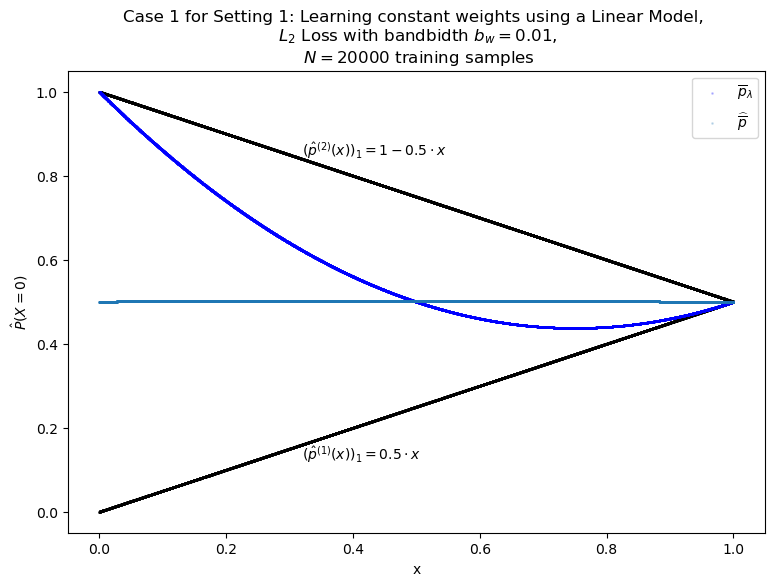

In [18]:
# plot the calculated predicted probabilities vs the real calibrated ones for the constant case
fig, ax = plt.subplots(figsize=(9, 6))

#scatter plot ensemble predictions 
ax.scatter(x_inst.squeeze(), p_probs[:,0,0], alpha=0.2, s=1, 
           color="black")
ax.scatter(x_inst.squeeze(), p_probs[:,0,1],  alpha=0.2, s=1,
           color="black")
# plot convex combination with constant weights, for w = 0.5
ax.scatter(x_inst.squeeze(), p_bar[:, 0], label='$\overline{p}_{\lambda}$', s=1, alpha=0.2, 
           color="blue")
ax.scatter(x_inst.squeeze(), p_bar_calc[:, 0], label='$\widehat{\overline{p}}$', s =1,
            alpha=0.2)

ax.set_xlabel('x')

ax.set_ylabel('$\hat{P}(X=0)$')
ax.text(0.32, 0.125, "$(\hat{p}^{(1)}(x))_1 = 0.5 \cdot x$", fontsize=10, color='black')
ax.text(0.32, 0.85, "$(\hat{p}^{(2)}(x))_1 = 1 - 0.5 \cdot x$", fontsize=10, color='black')

plt.title("Case 1 for Setting 1: Learning constant weights using a Linear Model, \n $L_2$ Loss with bandbidth $b_w=0.01$, \n $N=20000$ training samples")
plt.legend()

# now calculate the average distane between calibrated predictions and estimated ones
# ( mean absolute error)
#mae_const = np.mean(np.abs(p_bar - p_bar_pred))
#print(f"MAE for constant weights: {mae_const}")

#ax.text(0.32, 0.6, f"MAE = {mae_const:.3f}", fontsize=10, color='black')

### 2. $H_1$ Test

In [21]:
x_inst, p_probs, y_labels, p_bar = cone_experiment_h1(n_samples = params["n_samples"],
                                                               )

Plot:

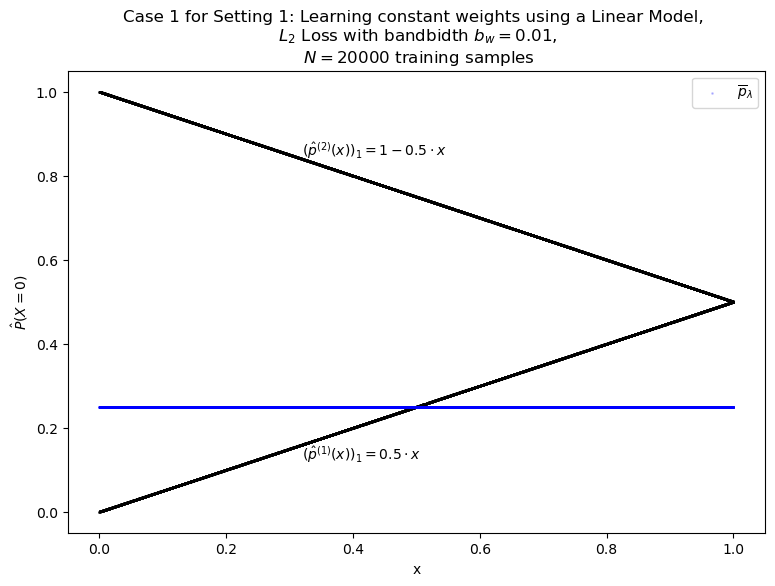

In [22]:
# plot the calculated predicted probabilities vs the real calibrated ones for the constant case
fig, ax = plt.subplots(figsize=(9, 6))

#scatter plot ensemble predictions 
ax.scatter(x_inst.squeeze(), p_probs[:,0,0], alpha=0.2, s=1, 
           color="black")
ax.scatter(x_inst.squeeze(), p_probs[:,0,1],  alpha=0.2, s=1,
           color="black")
# plot convex combination with constant weights, for w = 0.5
ax.scatter(x_inst.squeeze(), p_bar[:, 0], label='$\overline{p}_{\lambda}$', s=1, alpha=0.2, 
           color="blue")
#ax.scatter(x_inst.squeeze(), p_bar_pred[:, 0], label='$\widehat{\overline{p}}$', s =1,
 ##           alpha=0.2)

ax.set_xlabel('x')

ax.set_ylabel('$\hat{P}(X=0)$')
ax.text(0.32, 0.125, "$(\hat{p}^{(1)}(x))_1 = 0.5 \cdot x$", fontsize=10, color='black')
ax.text(0.32, 0.85, "$(\hat{p}^{(2)}(x))_1 = 1 - 0.5 \cdot x$", fontsize=10, color='black')

plt.title("Case 1 for Setting 1: Learning constant weights using a Linear Model, \n $L_2$ Loss with bandbidth $b_w=0.01$, \n $N=20000$ training samples")
plt.legend()

# now calculate the average distane between calibrated predictions and estimated ones
# ( mean absolute error)
#mae_const = np.mean(np.abs(p_bar - p_bar_pred))
#print(f"MAE for constant weights: {mae_const}")

#ax.text(0.32, 0.6, f"MAE = {mae_const:.3f}", fontsize=10, color='black')

In [11]:
mlp_model = MLPCalW(in_channels = x_inst.shape[1], out_channels = 2, hidden_dim = 32, hidden_layers=0, use_relu=False)

model, loss_train, loss_val = train_mlp(mlp_model, dataset_train=dataset_h0, loss=params["loss"],
                                          n_epochs = params["n_epochs"], lr = params["lr"],
                                          batch_size=params["batch_size"], patience=50)

Epoch: 0 train loss: 0.0002895460446779907 val loss: None 
 lr: 0.0001
Epoch: 1 train loss: 0.0002917335143138189 val loss: None 
 lr: 0.0001
Epoch: 2 train loss: 0.00016353739815713197 val loss: None 
 lr: 0.0001
Epoch: 3 train loss: 0.00012174263732731561 val loss: None 
 lr: 0.0001
Epoch: 4 train loss: 0.000418767915425633 val loss: None 
 lr: 0.0001
Epoch: 5 train loss: 0.0003058118076495475 val loss: None 
 lr: 0.0001
Epoch: 6 train loss: 0.00038282072891888675 val loss: None 
 lr: 0.0001
Epoch: 7 train loss: 0.00016485143263480495 val loss: None 
 lr: 0.0001
Epoch: 8 train loss: 0.00013892438328184654 val loss: None 
 lr: 0.0001
Epoch: 9 train loss: 0.0003149365040485463 val loss: None 
 lr: 0.0001
Epoch: 10 train loss: 0.00014296647706260046 val loss: None 
 lr: 0.0001
Epoch: 11 train loss: 0.0002797980745526729 val loss: None 
 lr: 0.0001
Epoch: 12 train loss: 0.00028591975878953233 val loss: None 
 lr: 0.0001
Epoch: 13 train loss: 0.00020904217107968747 val loss: None 
 lr: 0.

In [12]:
# calculöate optimal predicted weights 
weights_cals = model(torch.from_numpy(x_inst).float()).detach().numpy()
weights_calc

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       ...,
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5]], dtype=float32)

In [11]:
mlp_model = MLPCalW(in_channels= x_inst.shape[1], out_channels= p_probs.shape[1], 
                    hidden_dim=params_skce['hidden_params'], hidden_layers=params_skce['hidden_layers'],
                    use_relu=True)

dataset_train= MLPDataset(x_train=x_inst, P=p_probs, y=y_labels)